In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime
import math 

In [2]:
df_info = pd.read_csv('clean_data.csv')
df_info.drop(df_info[df_info['Price(Triệu/tháng)'] > 100].index, inplace = True)
df_info.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,17/10/2018
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,05/10/2018
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,06/10/2018
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,09/10/2018


In [3]:
quan = pd.unique(df_info.District)
df_info["Date"] = pd.to_datetime(df_info["Date"])
array = {}
#Lấy ngày hiện tại
today = date.today()
today = np.datetime64(today)

### Tìm ra giá nhà phù hợp nhất theo quận 
Một số người cần thuê nhà/phòng trọ gấp, không có thời gian để đọc được trên một số lượng lớn bài đăng để tìm ra phòng hợp lí cho mình. Những phòng/nhà trọ giá rẻ thường có diện tích nhỏ và sẽ khó có những tiện tích như wifi, nhà xe, camera an ninh, bảo vệ, dọn vệ sinh... Vì vậy để có được giá cả hợp lí thì ta sẽ dựa vào giá nhà trung bình trong quận và tìm ra giá gần với trung bình nhất. Để giảm thiểu về các biến động giá ta sẽ tính trong 2 năm gần nhất.


 Để tìm trung bình giá của một quận, ta sẽ tính trung bình giá của một bài đăng sau đó cộng lại và chia cho số lượng bài đăng. Từ đây ta sẽ tìm bài đăng có khoảng cách ngắn nhất so với trung bình.

In [4]:
#Xét theo quận
for i in quan:
    arr = {}
    district = df_info[df_info['District'] == i]
    price = district['Price(Triệu/tháng)']
    price  = list (price)
    square =  district['Square(m²)']
    square  = list (square)
    #Các bài đăng trong quận đó
    post = np.array([price[i] / square[i] for i in range(0,len(price))])
    lenPost = len(post)
    # Giá trung bình của một một quận
    Medimum = np.array([price[i] / square[i] for i in range(0,len(price))]).sum()/len(price)
    first = district.values[0]
    first = first[2]/first[3]
    min = 5000
    Get = district.head(1).values
    #Lưu price/square của một bài đăng
    each = []
    #Biến chọn giá
    choosePrice = min
    for j in district.values:
        checkDate = pd.to_datetime(j[6])
        count = today - checkDate
        if (count.days < 705):
            if pd.notna(j[2]) & pd.notna(j[3]):
                #giá một bài
                cal =  float (j[2]/j[3])
                if (cal != 0):
                    each.append(cal)
                    find = float(abs(cal-Medimum))
                    if find <= min:
                        choosePrice = cal
                        min = find
                        Get = j
    arr['Price'] = price
    arr['Square'] = square
    arr['Price/square'] = post
    arr['Price/square count'] = lenPost 
    arr['Price/square medium'] = Medimum
    arr['Choosen Price/square'] = choosePrice
    arr['Choosen inf'] = Get
    array[i] = arr


#### Lựa ra các quận tiêu biểu để trực quan hoá, dựa trên số lượng bài đăng

In [5]:
select = {}
sort =[]
for j in array:
    # print (set(array[j]["Choosen inf"]))
    sort.append(array[j]["Price/square count"])
sort.sort(reverse=True)
sort = sort[:9]
# print (sort)
quan = []
for i in sort:
    for j in array:
        # print (set(array[j]["Choosen inf"]))
        if i == array[j]["Price/square count"]:
            select[j] = array[j]
            quan.append (j)

# print (select)  
print("Các quận tiêu biểu là: ", quan) 
array = select

Các quận tiêu biểu là:  ['Bình Thạnh', 'Tân Bình', 'Quận 7', 'Gò Vấp', 'Quận 1', 'Tân Phú', 'Phú Nhuận', 'Bình Tân', 'Quận 10']


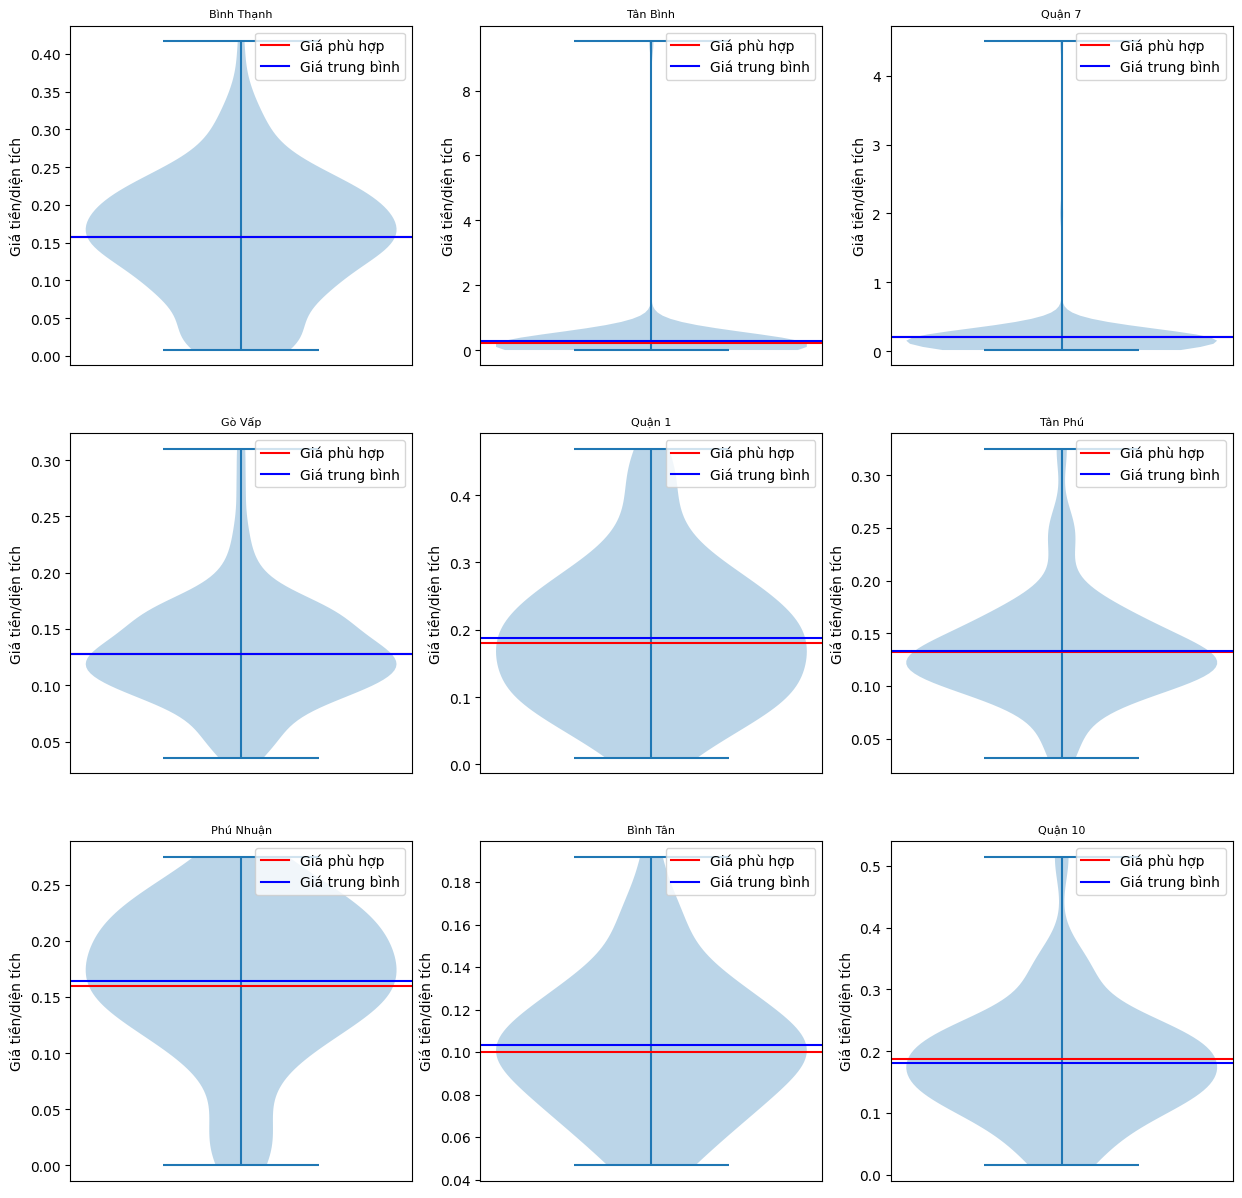

In [6]:
#Vẽ biểu biểu đồ
fig ,axis = plt.subplots(3,3,figsize =(15, 15))
run = 0
for i in range(0,3 ):
    for j in range(0,3 ):
        if run != len(quan) :
            axis[i][j].violinplot(array[quan[run]]["Price/square"])
            # axis[i][j].set_xlabel("Số bài đăng")
            axis[i][j].set_ylabel("Giá tiền/diện tích")
            axis[i][j].set_title(quan[run], fontsize = 8)
            x = array[quan[run]]['Choosen Price/square']
            x1 = array[quan[run]]['Price/square medium']
            axis[i][j].axhline(y = x, color = 'r', linestyle = '-',label ='Giá phù hợp')
            axis[i][j].axhline(y = x1, color = 'b', linestyle = '-',label ='Giá trung bình')
            axis[i][j].legend()
            axis[i][j].set_xticks([])
            run += 1

### Thông tin của các bài đăng sau khi đã lựa chọn

In [7]:
# Data
# print ("Data: ", array)
for j in array:
    # print (set(array[j]["Choosen inf"]))
    if (type(array[j]["Choosen inf"])!= float):
        print("================================== ")
        print (j)
        print("Giá trung bình: ", array[j]["Price/square medium"])
        print("Giá phù hợp: ", array[j]["Choosen Price/square"])
        print("*Thông tin* ")
        print("ID: ", array[j]["Choosen inf"][0])
        print("Tiêu đề: ", array[j]["Choosen inf"][1])
        print ("Giá (triệu/tháng): ", array[j]["Choosen inf"][2] )
        print ("Diện tích: ", array[j]["Choosen inf"][3]) 
        print ('Ngày đăng: ', array[j]["Choosen inf"][6])
        print (" ")

Bình Thạnh
Giá trung bình:  0.15738975163793065
Giá phù hợp:  0.15714285714285714
*Thông tin* 
ID:  2023597
Tiêu đề:  Phòng trọ Bình Thạnh thuận tiện cho sinh viên gần nhiều trường ĐH
Giá (triệu/tháng):  5.5
Diện tích:  35.0
Ngày đăng:  2022-04-08 00:00:00
 
Tân Bình
Giá trung bình:  0.2691688266893564
Giá phù hợp:  0.22380952380952382
*Thông tin* 
ID:  1918452
Tiêu đề:  Chi tiết Gần Etown, Full NT, 4,7tr Ban công, Nước Nóng Lạnh
Giá (triệu/tháng):  4.7
Diện tích:  21.0
Ngày đăng:  2022-03-17 00:00:00
 
Quận 7
Giá trung bình:  0.20154862824722006
Giá phù hợp:  0.2
*Thông tin* 
ID:  2063757
Tiêu đề:  Cho Thuê Phòng Đường Mai Văn Vĩnh, Quận 7, Ban Công Thoáng Mát!!!
Giá (triệu/tháng):  4.0
Diện tích:  20.0
Ngày đăng:  2022-10-17 00:00:00
 
Gò Vấp
Giá trung bình:  0.1276683311242135
Giá phù hợp:  0.128
*Thông tin* 
ID:  1723350
Tiêu đề:  Cho thuê Phòng Trọ rộng rãi thoáng mát 100m ra Lê Đức Thọ 3.2tr/tháng
Giá (triệu/tháng):  3.2
Diện tích:  25.0
Ngày đăng:  2021-01-14 00:00:00
 
Qu